帮我实现一段python程序

确认程序运行的目录下的 hand_data.csv ，以及lesson9/hand_data.csv 是否存在

In [1]:
import os

# Define the paths to check
current_directory_path = os.path.join(os.getcwd(), 'hand_data.csv')
lesson9_directory_path = os.path.join(os.getcwd(), 'lesson9', 'hand_data.csv')

# Check if the files exist
current_directory_exists = os.path.exists(current_directory_path)
lesson9_directory_exists = os.path.exists(lesson9_directory_path)

current_directory_exists, lesson9_directory_exists


(True, False)

帮我读取hand_data.csv，

这个文件的第一行是每个关键点的序号

第一列是label

In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'hand_data.csv'
hand_data_df = pd.read_csv(file_path, index_col=0)  # Assuming the first column (index_col=0) is the label

# Display the first few rows of the dataframe to understand its structure
print(hand_data_df.head())

          1         2         3         4         5         6         7  \
0                                                                         
0  0.323485  0.366910  0.421951  0.457535  0.443799  0.452825  0.488182   
0  0.350470  0.392592  0.451907  0.488090  0.475615  0.481848  0.521687   
0  0.358427  0.398418  0.447429  0.473307  0.461633  0.479197  0.504879   
0  0.273408  0.329011  0.381295  0.403445  0.366336  0.366883  0.392145   
0  0.372875  0.427645  0.486167  0.513415  0.487892  0.480841  0.508465   

          8         9        10  ...        54        55        56        57  \
0                                ...                                           
0  0.458572  0.438811  0.436092  ... -0.031151 -0.030308 -0.006822 -0.025599   
0  0.489339  0.467389  0.466464  ... -0.037914 -0.037510 -0.008816 -0.030207   
0  0.476521  0.459888  0.455795  ... -0.035735 -0.031648 -0.010699 -0.033896   
0  0.378005  0.361618  0.331704  ... -0.040641 -0.037900 -0.014755 -0.0389

hand_data.csv中，第一列是标签列，一共有0，1，2三种标签。后面的63列都是坐标的信息

我希望用散点图对这些数据进行可视化

横轴是63种不同的特征，纵轴直接是坐标的值，用三种颜色分别代表不同的数据。

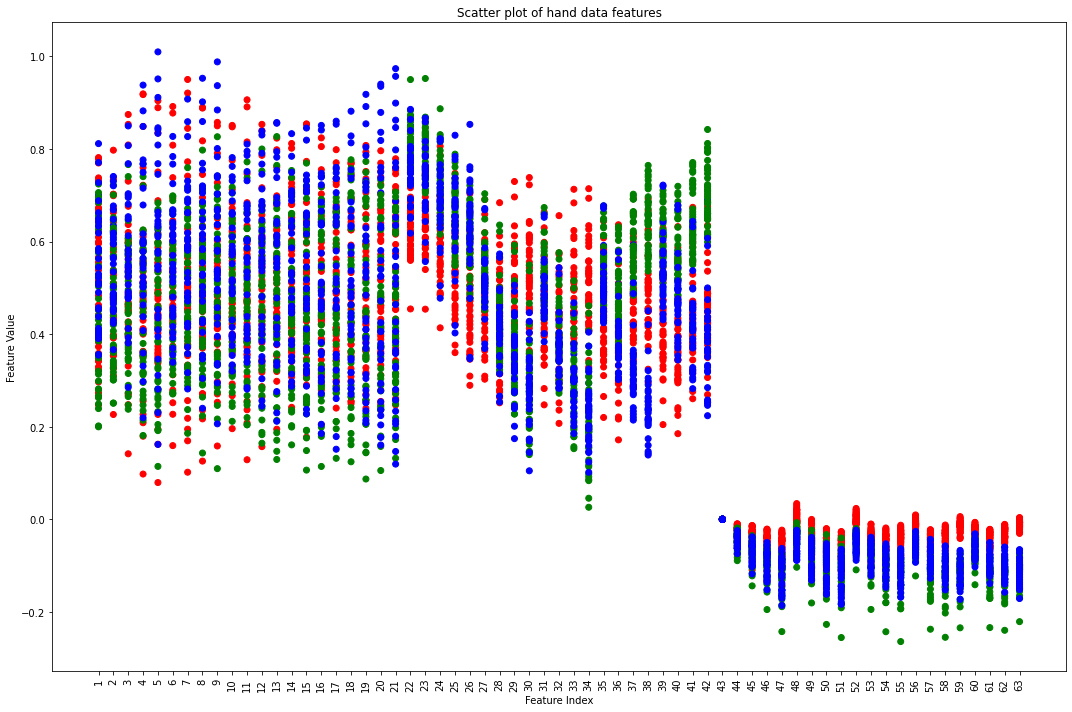

In [5]:
import matplotlib.pyplot as plt

import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'hand_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
# data.head()


# Define a color map for the labels
colors = {0: 'red', 1: 'green', 2: 'blue'}
color_list = data.iloc[:, 0].map(colors)

# Create a scatter plot for each feature (column) against the feature index
plt.figure(figsize=(15, 10))  # Set the figure size to fit all scatter plots
for i in range(1, data.shape[1]):
    plt.scatter([i] * len(data), data.iloc[:, i], c=color_list, label=data.columns[i])

# Improve the plot
plt.title('Scatter plot of hand data features')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.xticks(range(1, data.shape[1]), rotation=90)  # Set x-ticks to feature indices
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Move legend outside the plot

# Show the plot
plt.tight_layout()
plt.show()


hand_data.csv中，第一列是标签列，一共有0，1，2三种标签。后面的63列都是坐标的信息

我希望用散点图对这些数据进行可视化

横轴是63种不同的特征，纵轴直接是坐标的值，用三种颜色分别代表不同的数据。

因为63个特征分别是21个x，21个y，21个z，我希望每个数据减去自己的x或y或z的21个数的平均值

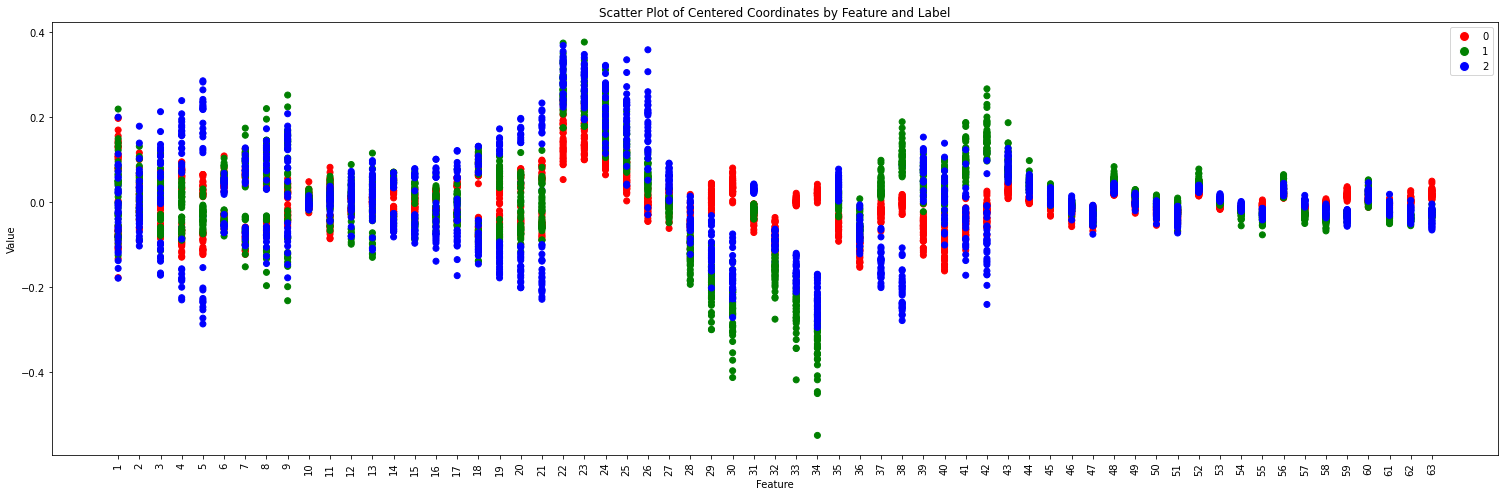

In [6]:
import pandas as pd

# Load the dataset
file_path = 'hand_data.csv'
hand_data = pd.read_csv(file_path)

# Check the first few rows of the dataframe to understand its structure
# hand_data.head()

# The data has 21 x, 21 y, and 21 z coordinates after the label column
# Split the data into x, y, and z coordinates and compute the mean for each set of coordinates
label_col = hand_data.iloc[:, 0]
x_coords = hand_data.iloc[:, 1:22]
y_coords = hand_data.iloc[:, 22:43]
z_coords = hand_data.iloc[:, 43:64]

x_mean = x_coords.mean(axis=1)
y_mean = y_coords.mean(axis=1)
z_mean = z_coords.mean(axis=1)

# Subtract the mean from each coordinate
x_coords_centered = x_coords.sub(x_mean, axis=0)
y_coords_centered = y_coords.sub(y_mean, axis=0)
z_coords_centered = z_coords.sub(z_mean, axis=0)

# Combine the centered coordinates back into a single dataframe
coords_centered = pd.concat([x_coords_centered, y_coords_centered, z_coords_centered], axis=1)

# Add the label column back
coords_centered_with_label = pd.concat([label_col, coords_centered], axis=1)

# Let's check the first few rows of the centered dataframe
coords_centered_with_label.head()

import matplotlib.pyplot as plt

# Prepare the data for plotting
labels = coords_centered_with_label.iloc[:, 0]
features = coords_centered_with_label.columns[1:]

# Create a scatter plot for each feature
plt.figure(figsize=(21, 7))

# Use different colors for different labels
colors = {0: 'red', 1: 'green', 2: 'blue'}

for feature in features:
    plt.scatter([feature] * len(labels), coords_centered_with_label[feature], 
                c=labels.map(colors), label=feature)

plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Scatter Plot of Centered Coordinates by Feature and Label')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(i), 
                              markerfacecolor=c, markersize=10) for i, c in colors.items()])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


hand_data.csv中，第一列是标签列，一共有0，1，2三种标签。后面的63列都是坐标的信息

我正在寻找和这三个分类最相关的特征，我怀疑某两列的相减的绝对值可以作为显著的分类特征

遍历所有的可能的两列相减的情况，帮我找到前30组最显著的列pair。